In [245]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import seaborn as sns
import random
import IPython.display
import librosa
from sklearn.model_selection import train_test_split

In [51]:
audios = []
labels = []
audio_files = os.listdir('Crema')
for file in audio_files:
    labels.append(file.split('_')[2])
    fs,data = wavfile.read(os.path.join('Crema',file))
    audios.append([data,fs])
    

In [52]:
print(len(labels))
print(len(audios))

7442
7442


In [53]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

In [54]:
fs_list = [x for _,x in audios]
set(fs_list) # all files have a sample rate of 16kHz

{16000}

,data,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",ANG
1,"[[30, 43, 52, 59, 77, 87, 108, 115, 152, 149, ...",DIS
2,"[[263, 277, 274, 244, 240, 220, 195, 191, 161,...",FEA
3,"[[-142, -107, -99, -88, -94, -53, -63, -40, -2...",HAP
4,"[[79, 45, 43, 19, -22, -65, -92, -101, -144, -...",NEU
...,...,...
7437,"[[30, 46, 45, 48, 34, 38, 34, 32, 9, 26, 27, 2...",DIS
7438,"[[-228, -222, -236, -251, -236, -249, -254, -2...",FEA
7439,"[[-74, -61, -76, -71, -67, -56, -74, -66, -73,...",HAP
7440,"[[-53, -35, -25, -19, -3, 8, 19, 20, 24, 61, 6...",NEU


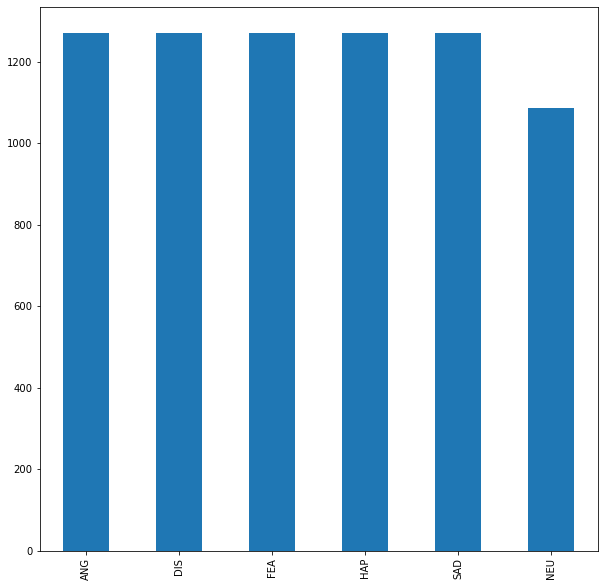

In [55]:
df = pd.concat([pd.Series(audios,name='data'),pd.Series(labels,name='label')],axis=1)
df['label'].value_counts().plot(kind='bar',figsize=(10,10))
df

In [203]:
audio = df['data'][0][0]
a = np.array(audio,dtype='float')
a.size

# zcr = np.nonzero(np.diff(audio > 0))[0]
# zero_crosses.size/audio.size
zcr=librosa.feature.zero_crossing_rate(a,frame_length=2048,hop_length=128)
# for i in np.squeeze(zcr):
#     print(i)
np.squeeze(zcr).size


285

In [130]:
emotions = {'ANG':'Angry','SAD':'Sad','NEU':'Neutral','HAP':'Happy','FEA':'Fear','DIS':'Disgust'}
colors = {'ANG':'red','SAD':'navy','NEU':'black','HAP':'yellow','FEA':'purple','DIS':'green'}

def load_audio(df,emotion):

    audios = list(df[df['label'] == emotion]['data'])
    idx = random.randint(0,len(audios)-1) # choosing a random file of that emotion
    audio = audios[idx][0]
    fs = audios[idx][1]
    duration = len(audio)/fs

    time = np.arange(0,duration,1/fs) # time vector

    plt.figure(figsize=(16,8))
    plt.plot(time,audio,color=colors[emotion])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(emotions[emotion] + ' Waveform')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()
    return audio, fs

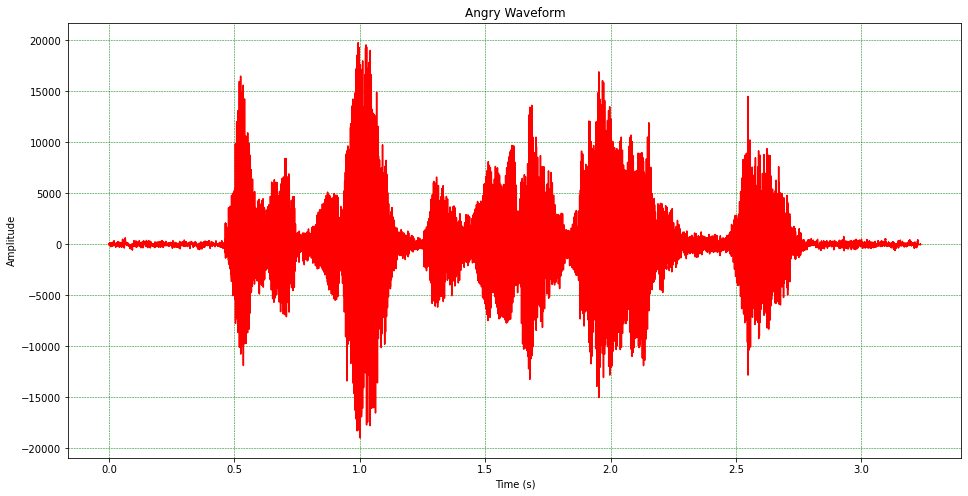

In [125]:
# ANGRY
audio,fs = load_audio(df,'ANG')
IPython.display.Audio(audio,rate=fs)


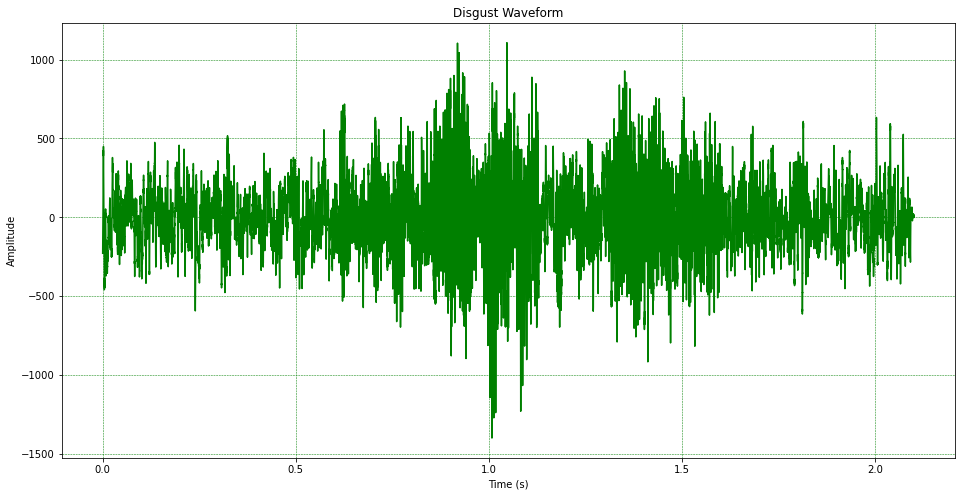

In [126]:
# DISGUSTED 
audio,fs = load_audio(df,'DIS')
IPython.display.Audio(audio,rate=fs)

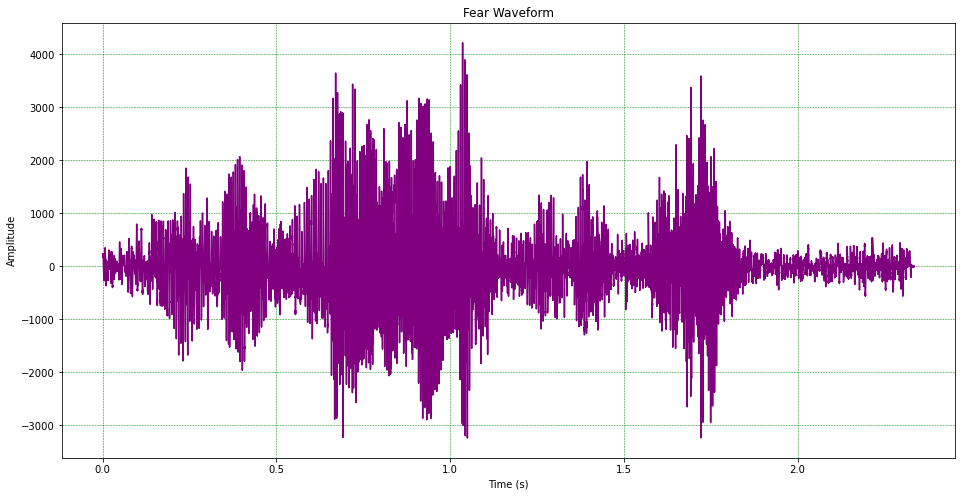

In [127]:
# FEAR
audio,fs = load_audio(df,'FEA')
IPython.display.Audio(audio,rate=fs)

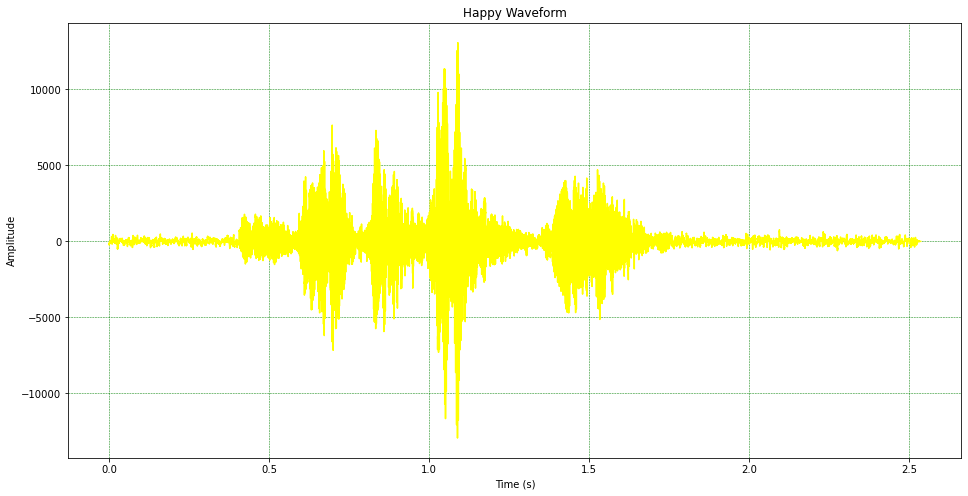

In [128]:
# HAPPY
audio,fs = load_audio(df,'HAP')
IPython.display.Audio(audio,rate=fs)

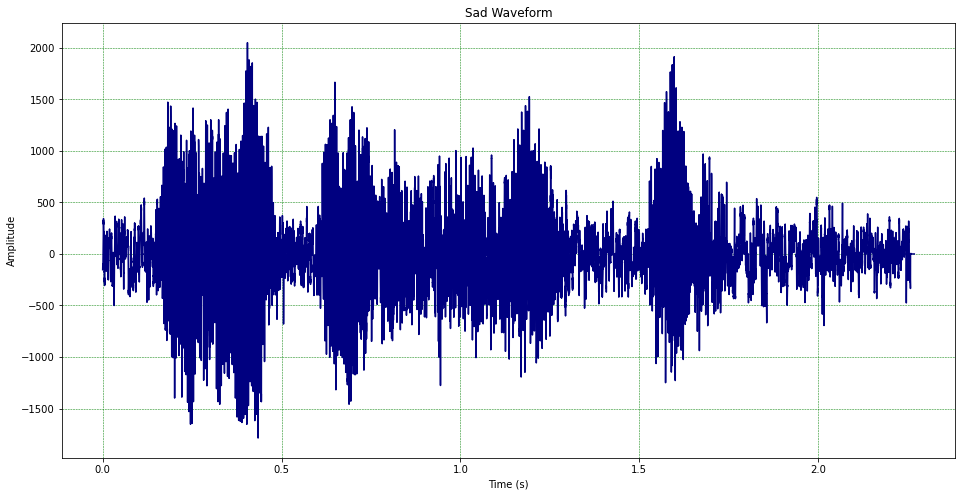

In [131]:
# SAD
audio,fs = load_audio(df,'SAD')
IPython.display.Audio(audio,rate=fs)

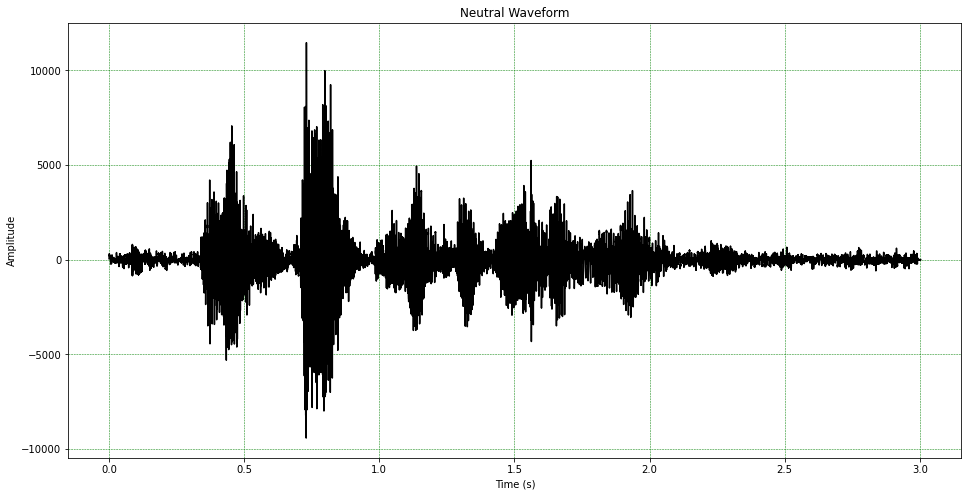

In [132]:
# NEUTRAL
audio,fs = load_audio(df,'NEU')
IPython.display.Audio(audio,rate=fs)

In [236]:
def create_feature_space(df,type):
    feature_space = []
    labels = []
    # zcrs=[]
    # energies=[]
    # mfccs=[]
    if type==1: # time/freq domain feature space
        for i,data in enumerate(df.to_numpy()):
            audio = np.array(data[0][0],dtype='float')
            fs = data[0][1]
            # zero_crosses = np.nonzero(np.diff(audio > 0))[0]
            # zcr = zero_crosses.size/len(audio) # zero crossing rate

            # zero crossing rate
            zcr=np.squeeze(librosa.feature.zero_crossing_rate(audio,frame_length=2048,hop_length=128))
            # print(zcr.shape)
            # zcrs.append(zcr)

            # normalized energy (root mean square)
            # energy=np.squeeze(librosa.feature.rms(audio,frame_length=2048,hop_length=128))
            energy = np.array([sum(abs(audio[i:i+2048]**2))/2048 for i in range(0, len(audio), 128)])
            # print(energy.shape)
            # energies.append(energy)

            # mel frequency cepstral coefficient (MFCC)
            mfcc=np.ravel(librosa.feature.mfcc(y=audio,sr=fs).T)
            # print(mfcc.shape)
            # mfccs.append(mfcc)
            feature_space.append(np.concatenate((zcr,energy,mfcc), axis=None))
            labels.append(data[1])
            if i%1000==0:
                print(f'audio #{i} checkpoint')

        # max_len = max([len(i) for i in zcrs]) # find the longest list of scr to padd the others until they have equal length


            
    return feature_space,labels



In [237]:
space,labels =create_feature_space(df,1)

audio #0 checkpoint
audio #1000 checkpoint
audio #2000 checkpoint
audio #3000 checkpoint
audio #4000 checkpoint
audio #5000 checkpoint
audio #6000 checkpoint
audio #7000 checkpoint


In [243]:
len(labels)

7442

In [246]:
X_train, X_test, y_train, y_test = train_test_split(space, labels, test_size=0.3, random_state=42,stratify=labels)
